# 事前準備

In [ ]:
import os
import json

import numpy as np
import pandas as pd


In [ ]:
# 自作モジュールの読み込み
from modules.file_format.HDF5 import HDF5Reader
from modules.data_format.Laser import Laser

In [ ]:
"""pathの設定"""
import sys
repository_root = None
for sys_path in sys.path:
    if sys_path.endswith('LAMBDA-Melting'):
        repository_root = sys_path
if repository_root is None:
    raise ValueError('repository_root is not set')

"""plot用の設定"""
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'cm'     #数式用のフォントejavuserif" or "cm"
plt.rcParams['xtick.direction'] = 'in'      #x軸の目盛線 #内in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'      #y軸の目盛線 #内in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0     #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0     #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 14               #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.8        #軸の線幅edge linewidth。囲みの太さ
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (8, 6)
# Arialフォントを設定
plt.rcParams.update({
    "font.family": "Arial",           # フォントをArialに設定
    "mathtext.fontset": "custom",     # カスタムフォントを指定
    "mathtext.rm": "Arial",           # 数式の通常テキスト部分
    "mathtext.it": "Arial",    # 数式のイタリック部分
    "mathtext.bf": "Arial"       # 数式の太字部分
})


# 使用するRunのリストを作成

In [ ]:
# hdfまでのroot
path_to_run_setting = os.path.join(repository_root, 'settings', 'run_selector.json')
with open(path_to_run_setting) as json_file:
    selected_run_setting = json.load(json_file)

hdf_folder = os.path.join(
    selected_run_setting['save_root_path'],
    'processed_hdf',
)
hdf_folder


In [ ]:
files = sorted(os.listdir(hdf_folder))
files


In [ ]:
# リストを作成
melted_list = [
    'OIbDia08_1st_down_processed.hdf',
    'OIbDia08_1st_up_processed.hdf',
    'OIbDia08_2nd_down_processed.hdf',
    'OIbDia08_2nd_up_processed.hdf',
    'OIbDia08_3rd_down_processed.hdf',
    'OIbDia08_3rd_up_processed.hdf',
    'OIbDia08_4th_down_processed.hdf',
    'OIbDia08_4th_up_processed.hdf',
    'OIbDia08_5th_down_processed.hdf',
    'OIbDia08_5th_up_processed.hdf',
    'OIbDia08_6th_down_processed.hdf',
    'OIbDia08_6th_up_processed.hdf',
    'OIbDia08_7th_down_processed.hdf',
    'OIbDia08_7th_up_processed.hdf'
]


In [ ]:
run_name_list = [
    'OIbDia08_1st',
    'OIbDia08_2nd',
    'OIbDia08_3rd',
    'OIbDia08_4th',
    'OIbDia08_5th',
    'OIbDia08_6th',
    'OIbDia08_7th',
]

In [ ]:
# hdf化
melted_hdf = []

for file in files:
    for melted in melted_list:
        if (melted in file) and (not file.startswith('.')):
            melted_hdf.append(HDF5Reader(os.path.join(hdf_folder, file)))

# Laser配列の取得

In [ ]:
laser_list = []
for run_name in run_name_list:
    laser = Laser(run_name)
    laser_list.append(laser)

# それぞれのRunの T と Laser のplot

In [ ]:
# すべてのRunで共通のものを取得
# 圧力を使用するので、時間配列はXRDのものを使う
frame_arr = melted_hdf[0].find_by(query='frame_XRD')
framerate = melted_hdf[0].find_by(query='framerate/XRD')

time_arr = frame_arr / framerate

In [ ]:
def get_T_arrays(hdf: HDF5Reader):
    T = hdf.find_by(query='processed/value/interpolated_T')
    T_error = hdf.find_by(query='processed/error/interpolated_T')
    return T, T_error

/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_1st_down_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。
/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_1st_up_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。


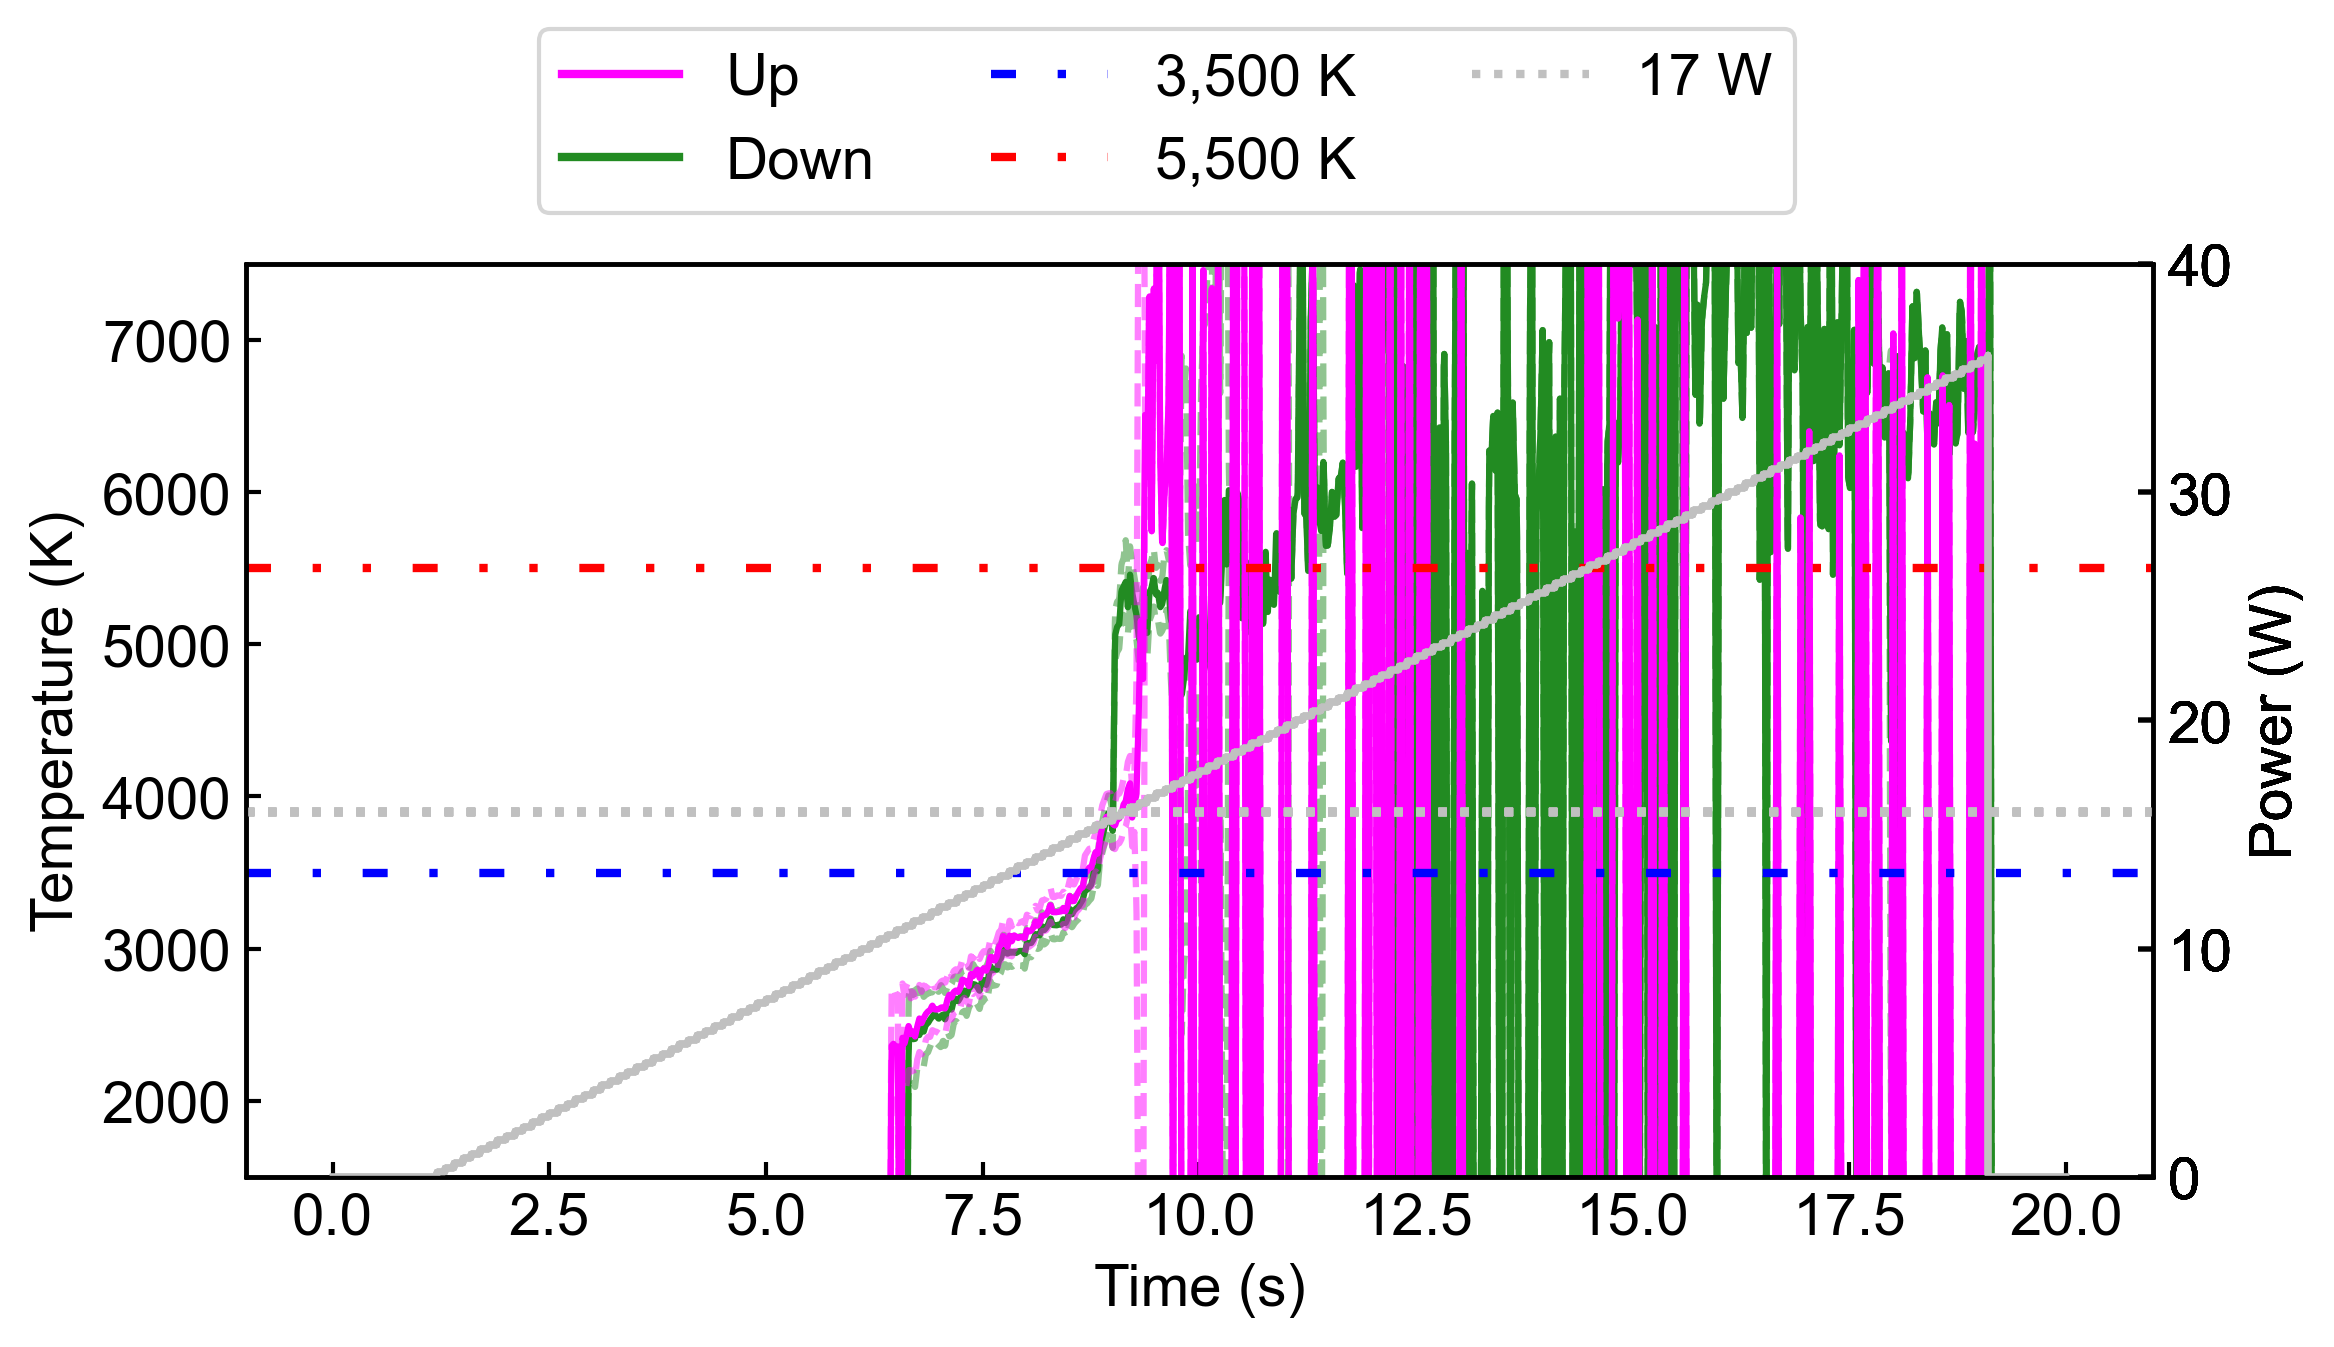

/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_2nd_down_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。
/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_2nd_up_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。


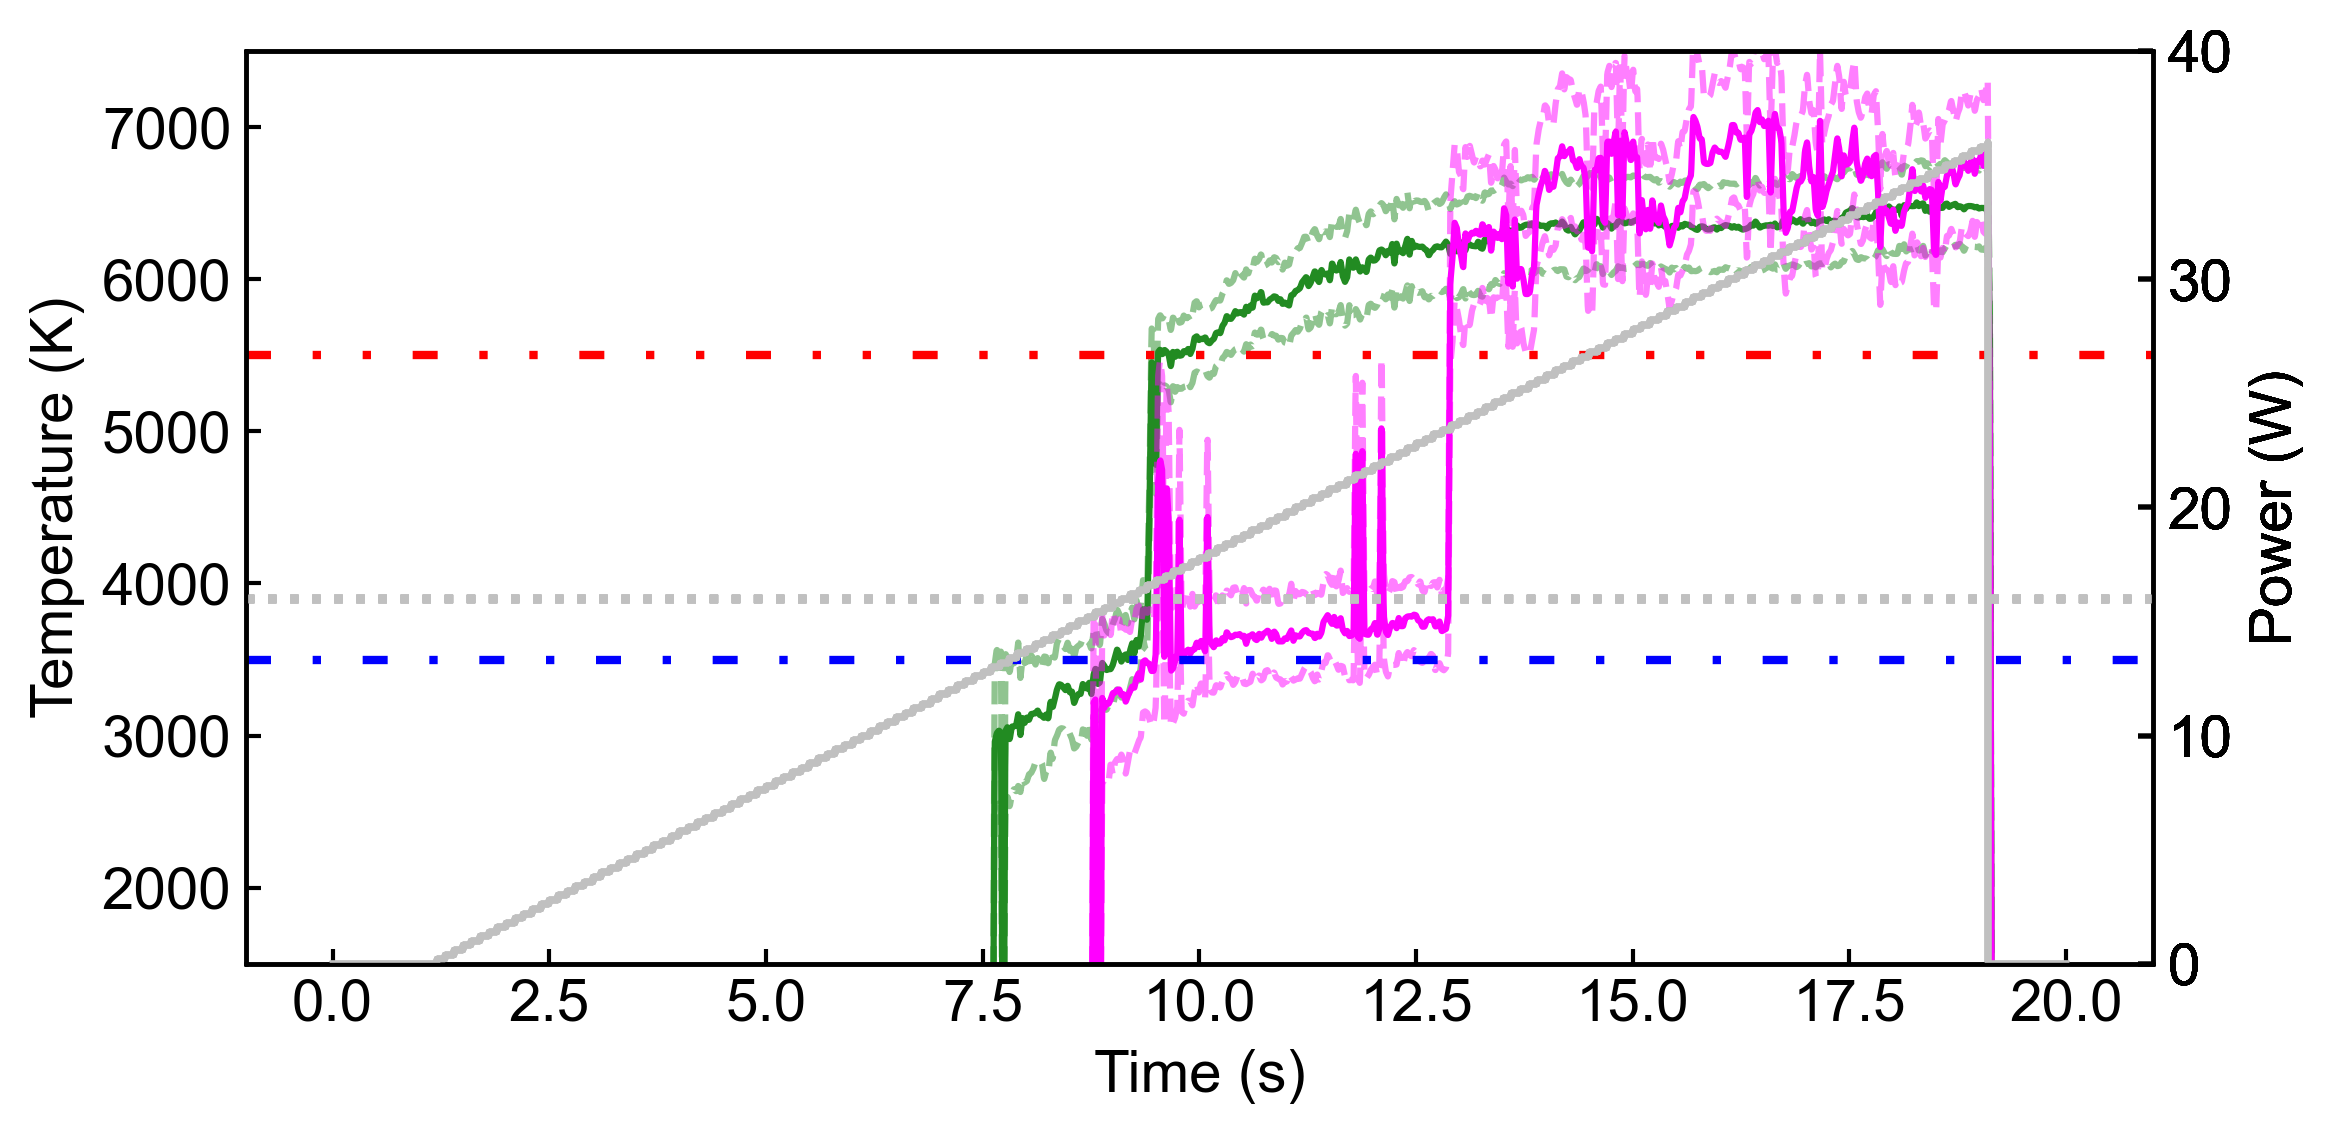

/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_3rd_down_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。
/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_3rd_up_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。


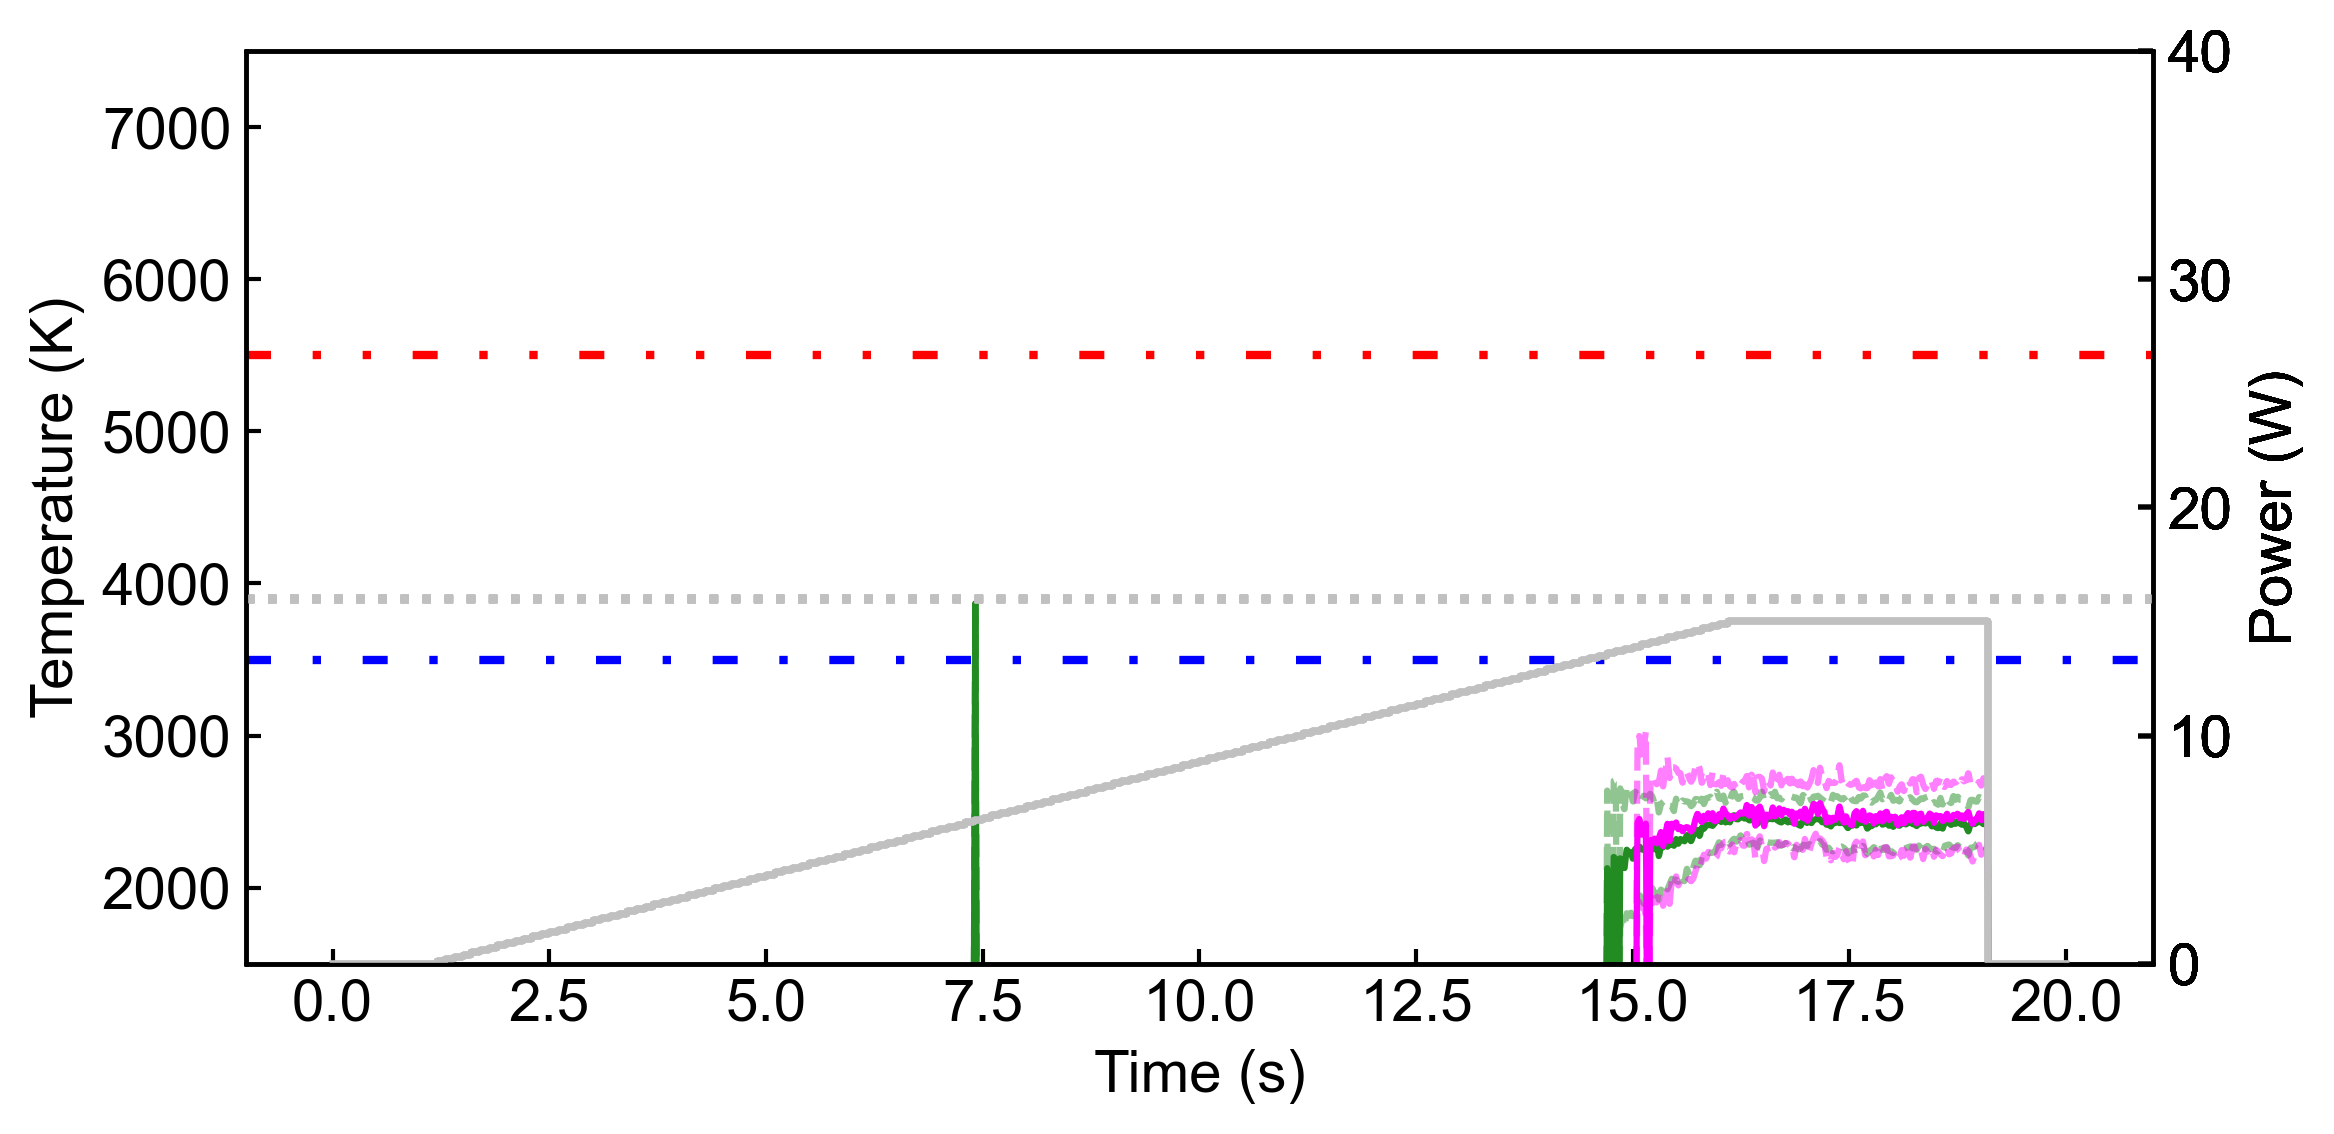

/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_4th_down_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。
/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_4th_up_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。


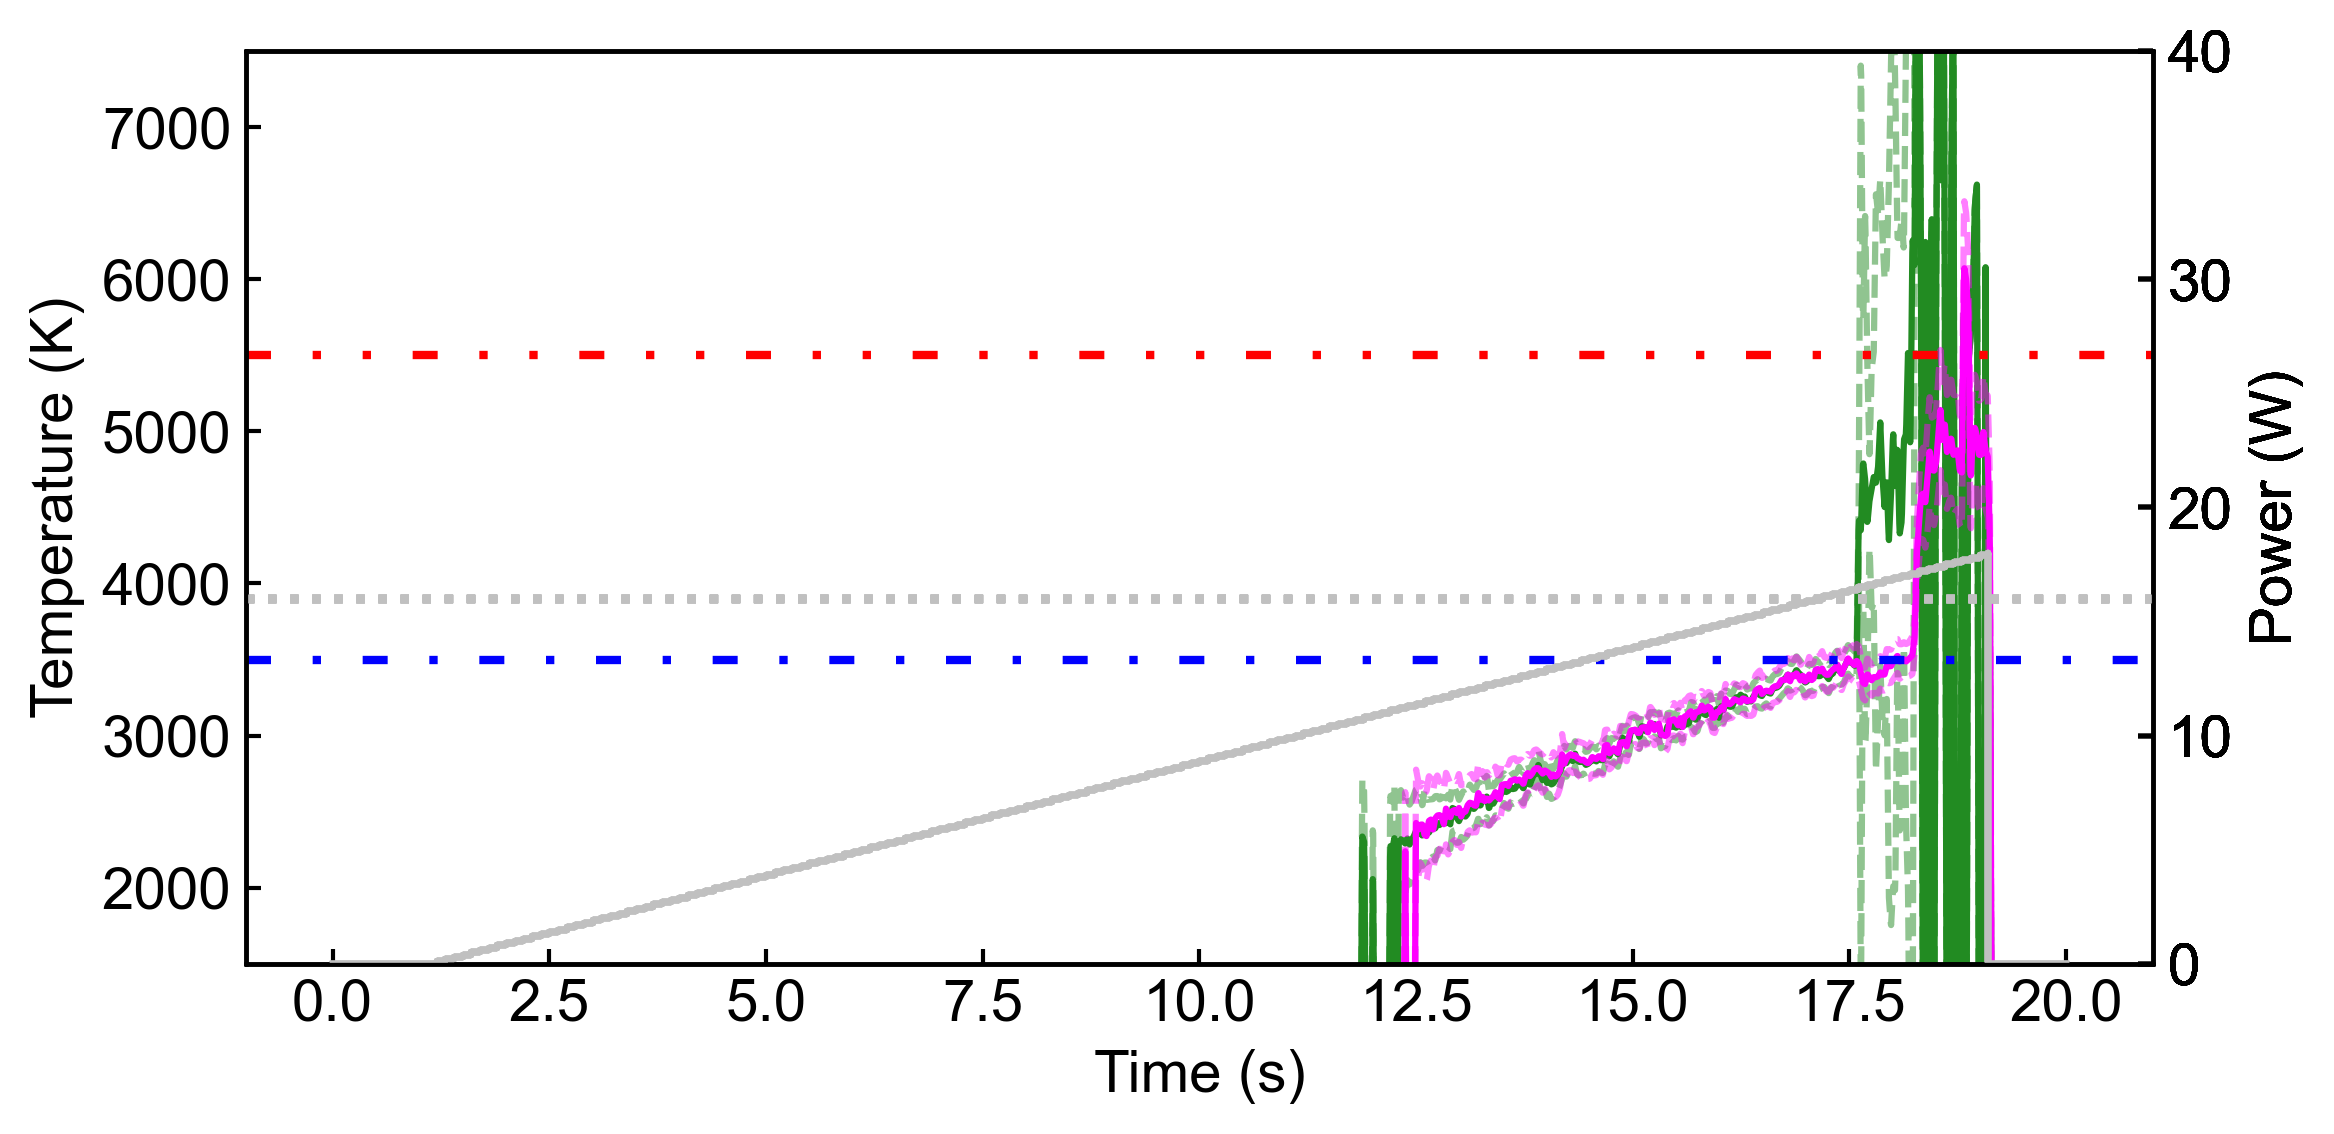

/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_5th_down_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。
/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_5th_up_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。


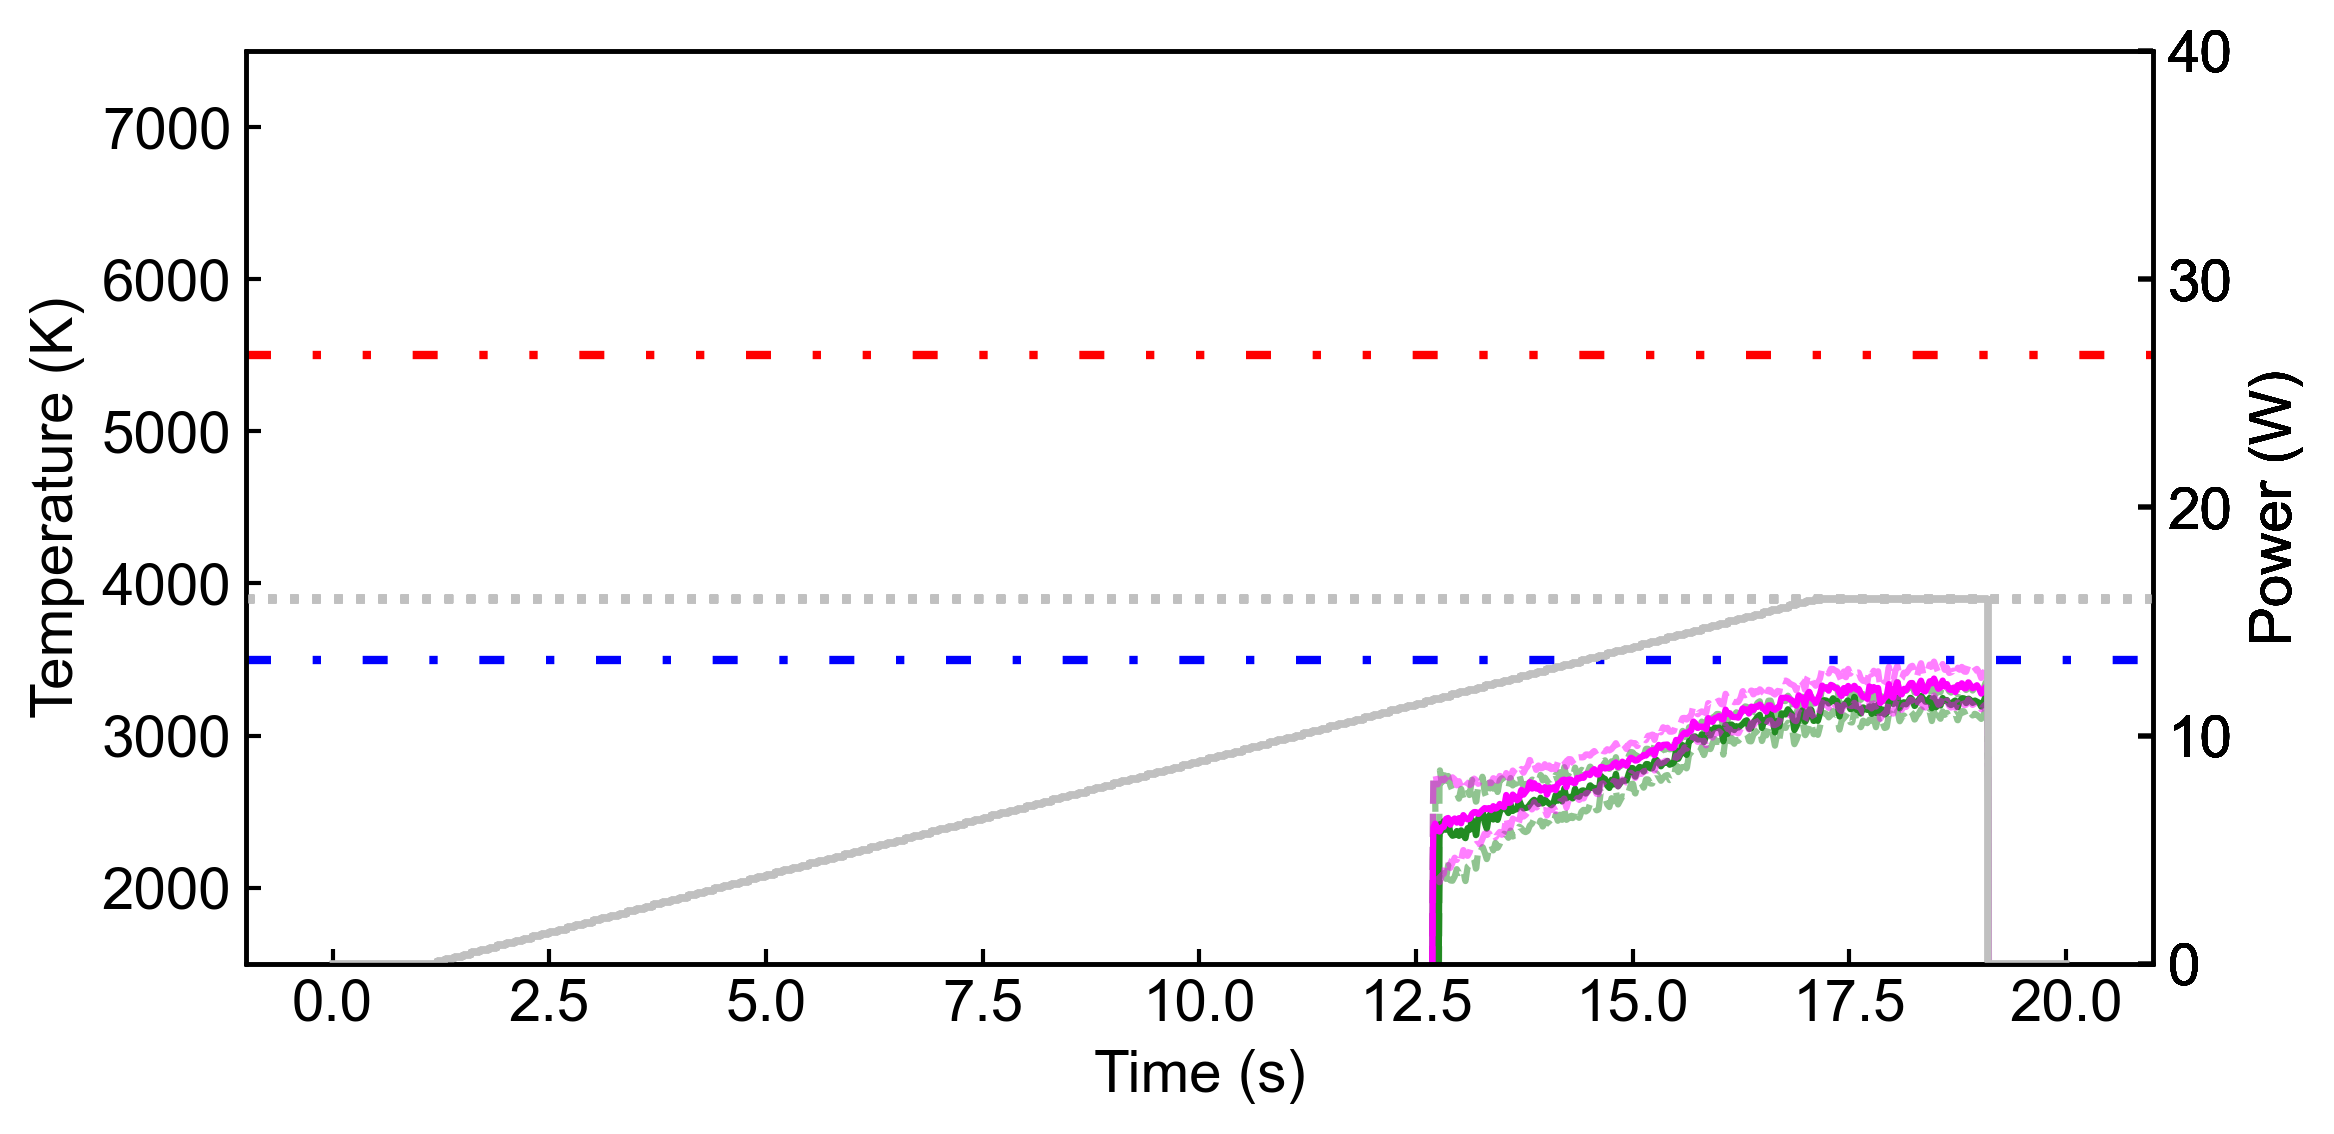

/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_6th_down_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。
/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_6th_up_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。


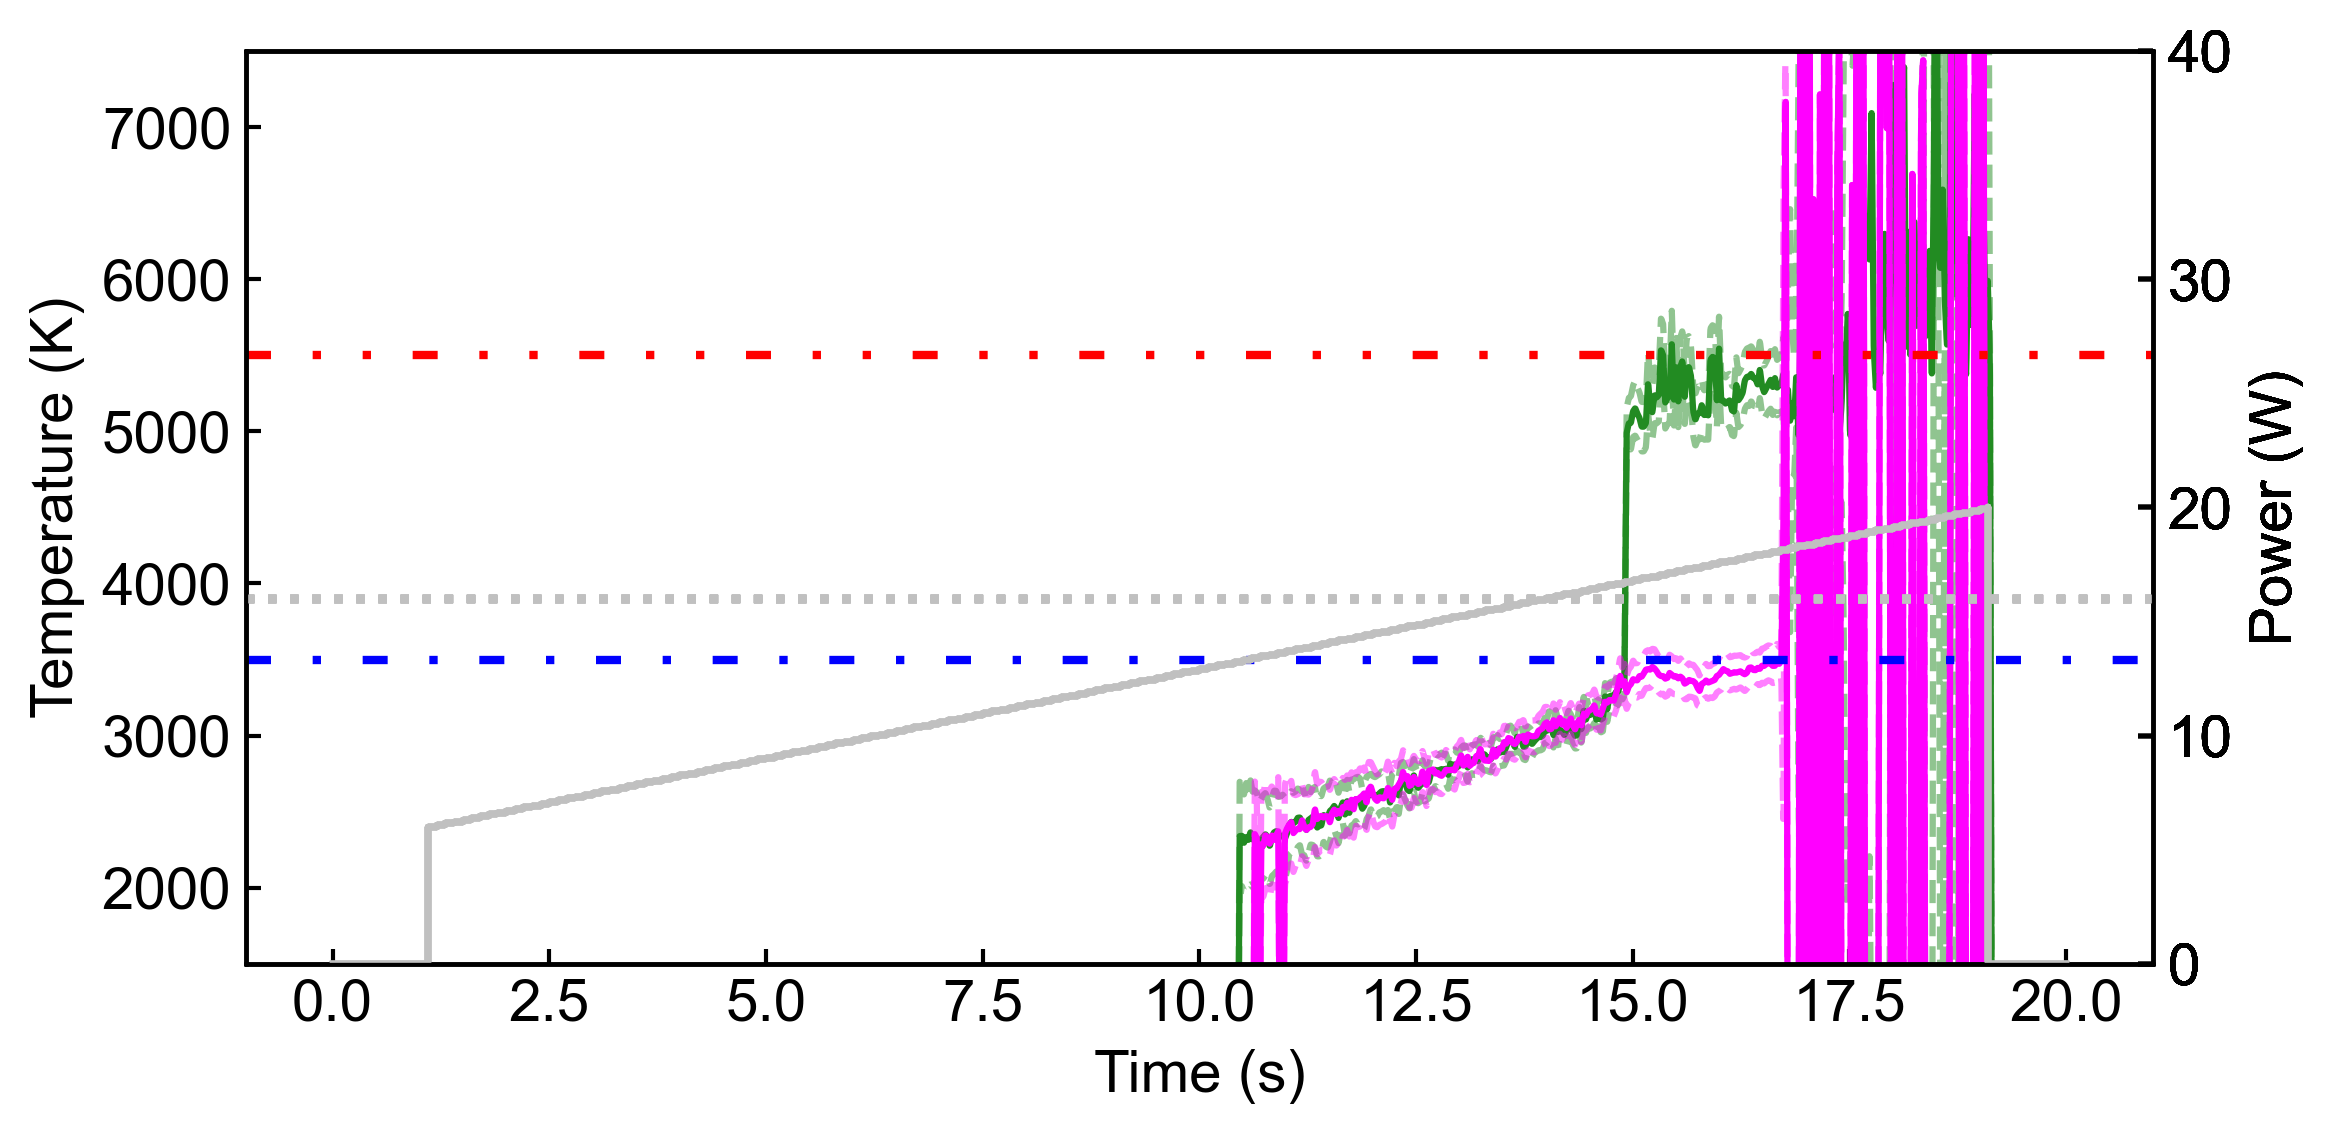

/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_down_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。
/Users/ishizawaosamu/work/MasterThesis/save/processed_hdf/OIbDia08_7th_up_processed.hdf
「processed/value/interpolated_T」で検索します。
	-> entry/processed/value/interpolated_T を返しました。
「processed/error/interpolated_T」で検索します。
	-> entry/processed/error/interpolated_T を返しました。


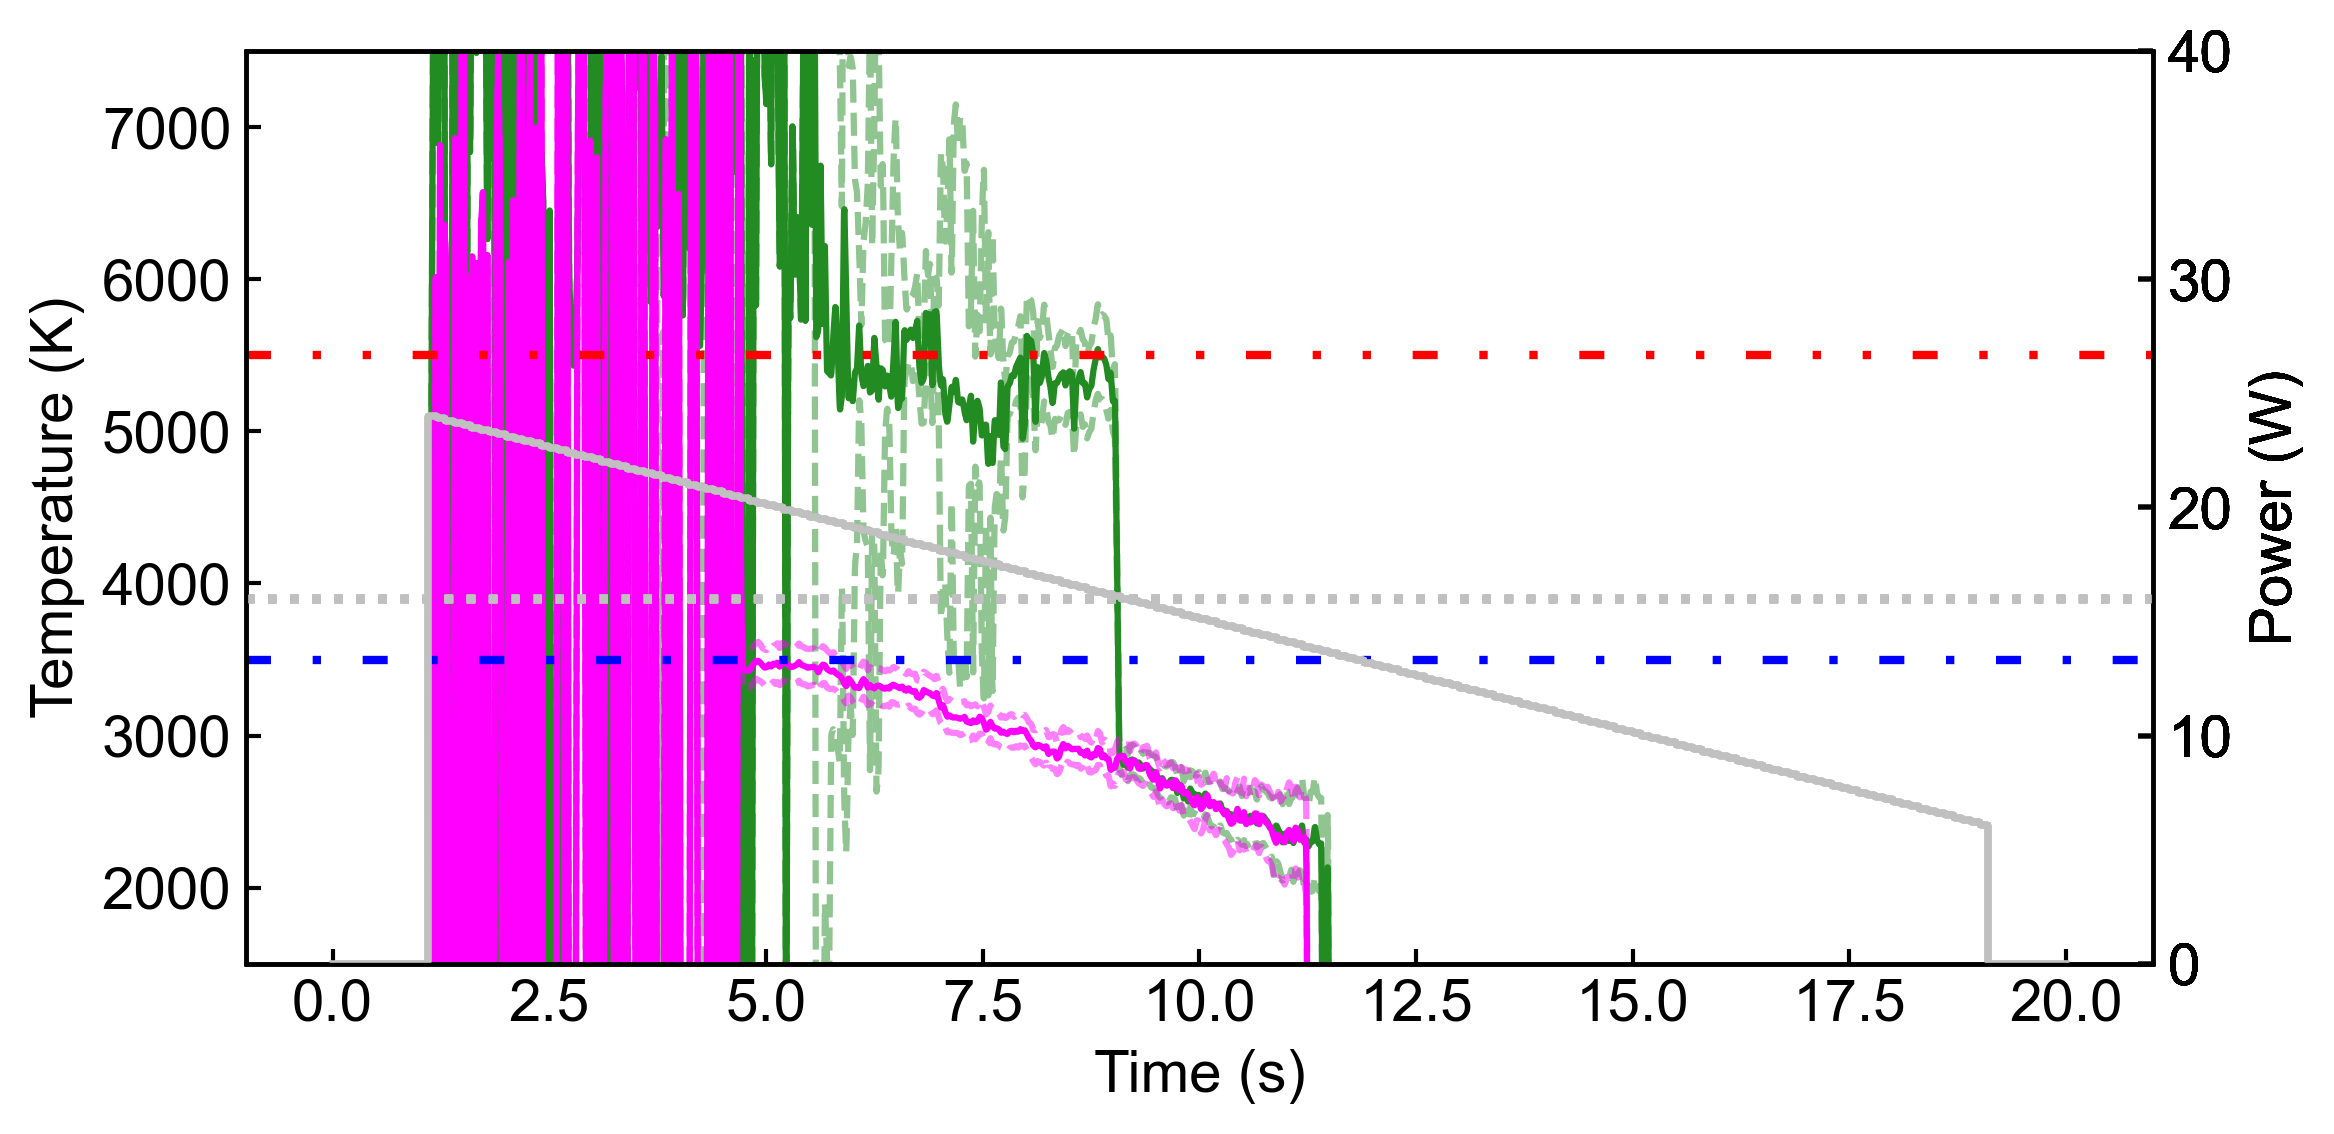

In [65]:
from matplotlib.lines import Line2D

for i, run_name in enumerate(run_name_list):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Temperature (K)')
    ax.set_ylim(1_500, 7_500)
    up_color = 'magenta'
    down_color = 'forestgreen'

    for hdf in melted_hdf:

        # up
        if (run_name in hdf.file_path) and ('up' in hdf.file_path):
            print(hdf.file_path)
            up_T, up_T_error = get_T_arrays(hdf)
            ax.plot(time_arr, up_T, color=up_color, label='Up')
            ax.plot(time_arr, up_T - up_T_error, color=up_color, alpha=0.5, linestyle='--')
            ax.plot(time_arr, up_T + up_T_error, color=up_color, alpha=0.5, linestyle='--')

        # down
        if (run_name in hdf.file_path) and ('down' in hdf.file_path):
            print(hdf.file_path)
            down_T, down_T_error = get_T_arrays(hdf)
            ax.plot(time_arr, down_T, color=down_color, label='Down')
            ax.plot(time_arr, down_T - down_T_error, color=down_color, alpha=0.5, linestyle='--')
            ax.plot(time_arr, down_T + down_T_error, color=down_color, alpha=0.5, linestyle='--')

        # laser
        twin = ax.twinx()
        laser = laser_list[i]
        twin.plot(laser.time_arr, laser.power_arr, color='silver')
        twin.axhline(16, color='silver', linestyle=':', linewidth=2)
        twin.set_ylabel('Power (W)')
        twin.set_ylim(0, 40)

    # 最初の図にだけカスタム凡例を上に配置
    if i == 0:
        custom_lines = [
            Line2D([0], [0], color=up_color, linewidth=2, label='Up'),
            Line2D([0], [0], color=down_color, linewidth=2, label='Down'),
            Line2D([0], [0], color='blue', linestyle=(0, (3, 5, 1, 5)), linewidth=2, label='3,500 K'),
            Line2D([0], [0], color='red', linestyle=(0, (3, 5, 1, 5, 1, 5)), linewidth=2, label='5,500 K'),
            Line2D([0], [0], color='silver', linestyle=':', linewidth=2, label='17 W')
        ]
        fig.legend(handles=custom_lines, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

    ax.axhline(3_500, color='blue', linestyle=(0, (3, 5, 1, 5)), linewidth=2)
    ax.axhline(5_500, color='red', linestyle=(0, (3, 5, 1, 5, 1, 5)), linewidth=2)
    plt.tight_layout()
    plt.show()
